### Доклад №2 "Модули элегантного кода: typing, enum, pathlib, contextlib, dataclasses"
Лысенко Л.М. B82

> #### Введение

В современной разработке на Python важно не только написать работающий код, но и сделать его понятным, безопасным и легко расширяемым. Модули **typing**, **enum**, **pathlib**, **contextlib** и **dataclasses** — это инструменты, которые помогают достичь этих целей. Они позволяют разработчикам писать код, который не только выполняет свою функцию, но и делает это элегантно и предсказуемо.

> ### Модуль **typing**

Рассмотрим пример:

In [ ]:
def process_data(data):
    items = data.get("items")
    if items is not None:
        return items[0].name
    return ""

**Мы можем задаться вполне логичными вопросами:**
>
Что такое **data**? Словарь?
>
У него точно есть метод **.get()**?
>
Что возвращает **data.get("items")**? Список?
>
У элемента этого списка есть атрибут **.name**?


**Вывод**: Чтобы это понять, приходится искать, где эта функция вызывается и что в нее передается. Это медленно и ведет к ошибкам.

---

Модуль **typing** обеспечивает поддержку выполнения аннотации типов.
>
**Аннотация типов** – это способ явно указать тип данных для переменной, аргумента функции или возвращаемого значения. Это не влияет на выполнение программы, но помогает статическим анализаторам кода проверять соответствие и выявлять потенциальные ошибки.

Мы можем сделать аннотацию для **переменных**:

In [ ]:
name: str = "Leonardo DiCaprio"
count: int = 100
is_active: bool = True

Также можем сделать аннотацию для **функций**:

In [ ]:
def greet(name: str) -> str:
    return f"Hello, {name}"

# name: str — аргумент name должен быть строкой.
# -> str — функция возвращает строку.

Вернемся к начальному примеру:

In [ ]:
# Было непонятно:
def process_data(data):
    items = data.get("items")
    if items is not None:
        return items[0].name
    return ""

In [3]:
# Стало ясно:
def process_data(data: dict) -> str:
    items = data.get("items")
    if items is not None:
        return items[0].name
    return ""


Рассмотрим некоторые из наиболее часто используемых аннотаций:

> #### List[T]
Списки описываются с использованием аннтоциии **List[T]**, где **T** – элементов списка.

In [7]:
from typing import List

def process_list(numbers: List[int]) -> None:
    for num in numbers:
        print(num)

Без аннотации **List[int]** Python не знает, что **numbers** должен быть списком чисел.

> #### Set[T]

Множества описываются с использованием аннотации **Set[T]**, где **T** – элементов множества. 

In [ ]:
from typing import Set

def unique_elements(items: Set[int]) -> None:
    for item in items:
        print(item)

Множества гарантируют уникальность элементов. Аннотация **Set[int]** говорит, что **items** — это множество чисел, а не список или кортеж.

> #### Dict[K, V]

Словари описываются с использованием аннотации **Dict[K, V]**, где **K** – тип ключей, а **V** – тип значений.

In [11]:
from typing import Dict

def count_occurrences(words: Dict[str, int]) -> int:
    total_count = 0
    for word, count in words.items():
        total_count += count
    return total_count

Аннотация **Dict[str, int]** говорит, что **words** – это словарь, где **ключи** – строки, а **значения** – целые числа.

> #### Union[A, B]

Описывает объединение двух или более типов. Значение может быть любым из указанных.

In [13]:
from typing import Union

def handle_value(value: Union[int, float]) -> None:
    if isinstance(value, int):
        print("Integer")
    else:
        print("Float")

Альтернативная запись:

In [16]:
def handle_value(value: int | float) -> None:
    if isinstance(value, int):
        print("Integer")
    else:
        print("Float")

Здесь **value** может быть или **int**, или **float**.

> #### Optional[T]


Указывает, что значение может быть либо типом **T**, либо **None**.

In [4]:
from typing import Optional

def divide(a: int, b: int) -> Optional[float]: # можно, кстати сделать и так: -> Union[float, None]
    if b == 0:
        return None
    return a / b

Альтернативная запись:

In [15]:
def divide(a: int, b: int) -> float | None:
    if b == 0:
        return None
    return a / b

> #### Any

**Any** – тип, который означает "любой тип". Отключает проверку типов для переменной или параметра. 

In [9]:
from typing import Any

def process_data(data: Any) -> None:
    print(data + 10)  # Статический анализатор не будет ругаться!

Используется, когда тип данных заранее неизвестен или может быть любым.
>
__*НО! Код с Any труднее анализировать и тестировать.*__

Также стоит отметить, что все функции *без возвращаемого типа или типов* параметров неявно по умолчанию будут использовать Any.

> #### Callable[[ArgTypes...], ReturnType]

Тип **Callable** описывает функцию с определенными аргументами и возвращаемым значением. Это удобно, когда нужно передавать функции в качестве аргументов.

In [10]:
from typing import Callable

def apply_function(func: Callable[[int, int], int], a: int, b: int) -> int:
    return func(a, b)

Разберемся более подробно с **func: Callable[[int, int], int], a: int, b: int**. Как это читается?
>
Функция **apply_function** принимает **3 аргумента**: 
> Функция **func**, которая принимает два аргумента типа **int** и возвращает значение типа **int**
>
> **a** и **b** — два целых числа.

---

> ### Модуль **enum**

Рассмторим статусы заказов в интернет-магазине <span style="color: #7D256F; background-color: white; border-radius: 5px; font-size: 20px; font-weight: bold; padding-left: 5px; padding-right: 5px;">Wildberries</span> :
>
1 - оформлен
>
2 - оплачен
>
3 - отправлен
>
4 - получен

In [18]:
order_status = 2

if order_status == 2:
    print("Заказ оплачен, можно собирать.")
elif order_status == 4:
    print("Заказ завершен.")

Заказ оплачен, можно собирать.


Но что означает цифра 2? А цифра 4?
>
Чтобы это понять, нужно искать комментарий или документацию. Это неудобно, код плохо читается, да и в целом легко ошибиться!

Первое, что приходит на ум – использование строк.

In [19]:
order_status = "paid"

Лучше? Да, но все равно есть риски: опечатки ("paid" vs "paied"), сложность автоматического завершения кода.

Также можно использовать константы:

In [20]:
ORDER_PROCESSING = 1
ORDER_PAID = 2
ORDER_SHIPPED = 3
ORDER_DELIVERED = 4

order_status = ORDER_PAID

if order_status == ORDER_PAID:
    print("Заказ оплачен, можно собирать.")

Заказ оплачен, можно собирать.


Лучше! Но есть недостатки. Например то, что **константы** — это просто переменные. Ничто не мешает им быть любым числом или даже строкой. А также нет единого пространства имен. Фактически все константы "*валяются*" в глобальной области видимости.

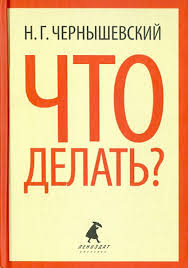

Нам на помощь приходит модуль **enum**!

**Перечисления (enum)** – это структура данных, используемая для создания именованных констант.
>
В Python они помогают организовать код, сделать его более читаемым и избежать ошибок, связанных с использованием "магических чисел" или строк. 
>
Этот инструмент особенно полезен при разработке сложных приложений, где требуется упорядочить фиксированные значения, такие как статусы задач, роли пользователей или режимы работы системы.

Перепишем наш пример со статусами заказа:

In [5]:
from enum import Enum

class OrderStatus(Enum):
    PROCESSING = 1
    PAID = 2
    SHIPPED = 3
    DELIVERED = 4

# Создаем переменную с определенным статусом
current_status = OrderStatus.PAID

# Проверяем статус
if current_status == OrderStatus.PAID:
    print("Заказ оплачен, можно собирать!")

# Выводим на печать
print(current_status)
print(current_status.name)
print(current_status.value)

Заказ оплачен, можно собирать!
OrderStatus.PAID
PAID
2


> #### Рассмотрим основные возможности **enum**:

Каждое значение **уникально** и **неизменно**.
>
Каждый элемент имеет **имя (name)** и **значение (value)**, что делает код **самодокументируемым**.
>
Перечисления **можно использовать в условиях и проверках**, упрощая сложные конструкции.
>
Поддержка итерации позволяет легко **перебирать все элементы перечисления**.
>
Возможность работы с **разными типами данных** (например, строки, числа), что делает **enum** гибким инструментом для различных задач.

> #### Методы и атрибуты **enum**
Методы и атрибуты данной структуры делают работу с перечислениями более удобной и интуитивной. С их помощью можно обращаться к значениям элементов, их именам и структуре, а также выполнять сложные проверки и операции. Они позволяют упростить код, улучшить его читаемость и обеспечивают строгую типизацию.

В Python **перечисления** обладают рядом встроенных возможностей, которые упрощают их использование:


Атрибут **name**. Позволяет получить название члена перечисления.

In [53]:
class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3

print(Color.RED.name)
print(Color.GREEN.name)


RED
GREEN


Атрибут **value**. Содержит значение, присвоенное элементу.

In [28]:
print(Color.RED.value)
print(Color.BLUE.value)


1
3


Получение доступа к членам перечисления:

In [46]:
print(Color(1))
print(Color(2))

Color.RED
Color.GREEN


In [45]:
print(Color['RED'])
print(Color['BLUE'])

Color.RED
Color.BLUE


**Итерация**. Enum можно перебрать в цикле для получения всех доступных значений.

In [29]:
class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3

for color in Color:
    print(color)


Color.RED
Color.GREEN
Color.BLUE


**Сравнение**. Члены перечисления можно сравнивать между собой.

In [16]:
from enum import IntEnum # Члены Enum не ведут себя как целые числа и не могут участвовать в целочисленных операциях.

class Color(IntEnum):
    RED = 1
    GREEN = 2
    BLUE = 3

print(Color.RED == Color.GREEN)  # False
print(Color.RED < Color.BLUE)    # True (1 < 3)
print(Color.GREEN != Color.BLUE) # True


False
True
True


**Приведение к списку**. Enum легко преобразуется в список для удобного доступа ко всем элементам.

In [44]:
class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3

colors_list = list(Color)

colors_list

[<Color.RED: 1>, <Color.GREEN: 2>, <Color.BLUE: 3>]

---

Когда точное значение членов перечисления **Enum** не важно, но нужно, чтобы у каждого члена было уникальное значение, можно использовать **enum.auto()**

**Как работает auto()?**
>
**auto()** — это специальный маркер, который  "*говорит*" **Enum**: "Присвой этому члену следующее доступное значение."
>
По умолчанию значения начинаются с **1** и увеличиваются на **1** для каждого следующего члена.

In [34]:
from enum import Enum, auto

class Color(Enum):
    BLACK = -2
    RED = auto()    # Значение: -1
    GREEN = auto()  # Значение: 0
    BLUE = auto()   # Значение: 1

for color in Color:
    print(f'The value of {color.name} is {color.value}')

The value of BLACK is -2
The value of RED is -1
The value of GREEN is 0
The value of BLUE is 1


In [46]:
# предложенный слушателями пример
from enum import Enum, auto

colors = ["RED", "GREEN", "BLUE"]

class Color(Enum):
    for color in colors: # Ошибка: цикл внутри тела класса
        color = auto()

TypeError: 'color' already defined as 'RED'

Python интерпретирует color = auto() как попытку переопределить имя элемента перечисления (например, RED), что запрещено.

Пример создания enum с auto() с использованием for

In [32]:
from enum import Enum, auto

colors = ["RED", "GREEN", "BLUE"]
Color = Enum(value='Color', names=dict((name, auto()) for name in colors))

for color in Color:
    print(f'The value of {color.name} is {color.value}')


The value of RED is 1
The value of GREEN is 2
The value of BLUE is 3


Мы можем также добиться того, чтобы значения членов перечисления enum с auto() шли с интервалом:

https://docs.python.org/3/library/enum.html#enum.auto

для этого переопределяют метод generate_next_value()

https://docs.python.org/3/library/enum.html#enum.Enum._generate_next_value_

In [44]:
from enum import Enum, auto

class Color(Enum):
    def _generate_next_value_(name, start, count, last_values):
        return (count + 1) * 2  # Начнем с 2, далее 4, 6 и т.д.
    RED = auto()
    GREEN = auto()
    BLUe = auto()

for color in Color:
    print(f'The value of {color.name} is {color.value}')


The value of RED is 2
The value of GREEN is 4
The value of BLUe is 6


> Параметры метода

- name: имя текущего элемента перечисления (например, "RED").
>
- start: значение, с которого начинается отсчёт (обычно 1).
>
- count: порядковый номер текущего элемента (начинается с 0).
>
- last_values: список значений, присвоенных предыдущим элементам.

> ### Модуль **pathlib**

Вообще для получения доступа к функциям операционной системы существует модуль **os**, который входит в состав стандартной библиотеки Python.
>
С его помощью можно выполнять разнообразные операции с файлами и каталогами, такие как создание, удаление, копирование, перемещение и многое другое.

Рассмотрим пример:

In [6]:
import os

# Создание пути
path = os.path.join('folder', 'subfolder', 'file.txt') # 'folder\\subfolder\\file.txt'

# Проверка существования
if os.path.exists(path):
    # Получение имени файла
    filename = os.path.basename(path)
    # Получение директории
    directory = os.path.dirname(path)
    # Проверка, это файл или папка?
    if os.path.isfile(path):
        print(f"Это файл: {filename}")

In [7]:
print(type(path))

<class 'str'>


##### Кажется, а что тут еще выдумывать?

Но на деле существуют проблемы такого подхода:
>
- **Строковый подход**: Пути — это просто строки => легко ошибиться
>
- **Сложности с кроссплатформенностью**: Хотя **os** абстрагируется от ОС, работа с путями может быть неудобной из-за различий в форматировании разделителей каталогов
>
- **Неочевидность**: Модуль **os** предоставляет базовые функции для работы с операционной системой, но многие связанные задачи требуют подключения других модулей, например **os.path**

---

Модуль **pathlib** в Python предоставляет объектно-ориентированный способ работы с путями файловой системы, заменяя традиционную обработку путей с помощью строк.
>
Основная идея, заключается в том, что *путь — это не строка, а объект с методами*.

In [ ]:
from pathlib import Path

# Создание объекта пути
path = Path('folder') / 'subfolder' / 'file.txt'

# Работа методами объекта
if path.exists():
    if path.is_file():
        print(f"Это файл: {path.name}")

In [5]:
print(type(path))

<class 'pathlib.WindowsPath'>


Модуль **pathlib** позволяет пользоваться более естественным синтаксисом, делает автоматическая правильную конкатенацию для текущей ОС и самостоятельно определяет нужные разделители.

In [29]:
# Вместо os.path.join(...)
path = Path('project') / 'src' / 'main.py'
print(path) 

project\src\main.py


In [22]:
# Можно комбинировать разными способами
base = Path('/home/user')
full_path = base / 'documents' / 'report.pdf'
print(full_path)

\home\user\documents\report.pdf


> #### Основные свойства объекта **Path**:

In [2]:
path = Path('/home/user/documents/report.pdf')

print(path.name)
print(path.stem)        # имя без расширения
print(path.suffix)      # расширение
print(path.parent)      # родительский каталог
print(path.parts)       # ('/', 'home', 'user', 'documents', 'report.pdf') - кортеж

report.pdf
report
.pdf
\home\user\documents
('\\', 'home', 'user', 'documents', 'report.pdf')


In [42]:
# Текущая директория
current = Path()

# Относительный путь
relative_path = Path('folder/file.txt')

# Абсолютный путь
absolute_windows = Path('C:/Users/Documents/file.txt')

# Домашняя директория пользователя
home_dir = Path.home()

# Текущий рабочий каталог
work_dir = Path.cwd()

Преимущества **pathlib** перед модулем **os** в Python включают объектно-ориентированный подход, делающий код более читаемым и интуитивным, встроенную поддержку кроссплатформенности за счёт автоматической адаптации разделителей пути.

> ### Модуль **contextlib**

> ##### Что такое **контекст** и **контекстный менеджер**?
**Контекст** – это "окружение" выполнения кода, сохраняющее состояние, чтобы можно было прервать выполнение и затем продолжить с того же места.
> 
**Контекстный менеджер** – это объект, который управляет этим контекстом, предоставляя методы **__ enter __()** (для входа в контекст) и **__ exit __()** (для выхода из контекста). 

Расмотрим пример:

- Открыли файл -> Поработали с ним -> Закрыли файл

Но может возникнуть проблема: можно забыть "закрыть" то, что "открыли"

In [ ]:
# Плохо: можно забыть закрыть файл
file = open('data.txt')
data = file.read()
# ... а закрыть? file.close()

##### Можно воспользоваться оператором **with**! 
>
Это ключевое слово в Python, используемое **для работы с менеджерами контекста**, которые автоматизируют управление ресурсами, такими как открытие/закрытие файлов или блокировка доступа. Оператор **with** гарантирует, что методы **__ enter __** и **__ exit __** менеджера контекста будут вызваны автоматически, обеспечивая корректное выделение и освобождение ресурсов, даже в случае возникновения ошибок. 

In [ ]:
# Файл закроется автоматически
with open('data.txt') as file:
    data = file.read()
# файл уже закрыт!

Модуль Python **contextlib** предоставляет инструменты для создания и управления менеджерами контекста, которые упрощают работу с ресурсами, требующими корректного выделения и освобождения, а также для обработки исключений.

Главный инструмент: **contextlib.contextmanager** - декоратор в Python, который позволяет превратить функцию-генератор в полноценный менеджер контекста для оператора **with**.

In [56]:
from contextlib import contextmanager

@contextmanager
def my_context():
    # ДЕЛАЕМ что-то ДО (как открыли файл)
    print("Начало")
    
    yield  # здесь выполняется код внутри with
    
    # ДЕЛАЕМ что-то ПОСЛЕ (как закрыли файл)
    print("Конец")

# Использование
with my_context():
    print("Работаем внутри")

Начало
Работаем внутри
Конец


> ##### Более понятным языком:

Декоратор **@contextmanager** позволяет создавать контекстные менеджеры без написания класса с методами **__ enter __** и **__ exit __**.
Вместо этого мы пишем генератор, который использует **yield** для разделения кода на две части:

- До **yield** — код, который выполняется перед блоком with (аналог **__ enter __** ).
>
- После **yield** — код, который выполняется после блока with (аналог **__ exit __** ).



---

> **Что происходит в примере выше?**

Вызов **my_context()** создаёт генератор.
>
Оператор **with** вызывает генератор, который выполняет код до **yield** (печатает "Начало").
>
Управление передаётся блоку **with** (печатается "Работаем внутри").
>
После завершения блока **with** выполнение продолжается после **yield** (печатается "Конец").

> #### Другие полезные инструменты **contextlib**

> **suppress** — игнорирование исключений

In [57]:
from contextlib import suppress

# Вместо try-except-pass
with suppress(FileNotFoundError):
    os.remove('some_file.txt')
    print("Файл удален, если существовал")

# Эквивалентно:
try:
    os.remove('some_file.txt')
except FileNotFoundError:
    pass

In [35]:
# реализация suppress
from contextlib import contextmanager

@contextmanager
def suppress(*exceptions):
    try:
        yield  # Выполняется код внутри with
    except exceptions:  # Ловим только указанные исключения
        pass  # Игнорируем их


> **closing** — для объектов с close()

In [59]:
from contextlib import closing
from urllib.request import urlopen

# Объект имеет метод close(), но не поддерживает with
with closing(urlopen('http://example.com')) as page:
    content = page.read()
    # page автоматически закроется


# Объект, возвращаемый urllib.request.urlopen, имеет метод close(),
# но не реализует протокол контекстного менеджера (у него нет методов __enter__ и __exit__).
# Поэтому его нельзя напрямую использовать с оператором with

> Что происходит по шагам?


- urlopen('http://example.com')
>
Открывает HTTP-соединение и возвращает объект HTTPResponse, у которого есть метод close().
>
- closing(urlopen('http://example.com'))
>
Функция closing берёт объект HTTPResponse и создаёт для него контекстный менеджер.
>
- with ... as page:
>
Оператор with вызывает метод __enter__ контекстного менеджера, который возвращает сам объект HTTPResponse (теперь он доступен как page).
>
- content = page.read()
>
Внутри блока with вы читаете содержимое страницы.
>
- Завершение блока with
>
После завершения блока with оператор with автоматически вызывает метод __exit__ контекстного менеджера, который в свою очередь вызывает page.close().

In [34]:
# реализация closing()
from contextlib import contextmanager

@contextmanager
def closing(obj):
    try:
        yield obj  # Возвращаем объект при входе в with
    finally:
        obj.close()  # Закрываем объект при выходе из with


> ### Модуль **dataclasses**

Рассмторим пример:

In [62]:
# Часто приходится писать такие классы:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Person:
    def __init__(self, name, age, email):
        self.name = name
        self.age = age
        self.email = email

In [64]:
actor = Person("Leonardo_DiCaprio", 50, "leodicap@.email.com")

print(actor.name, actor.age, actor.email, sep='\n\n')

Leonardo_DiCaprio

50

leodicap@.email.com


Но есть неудобство: здесь много "шаблонного" кода...


Для каждого класса часто приходится писать:

- __ init __ метод
>
- __ repr __ для красивого вывода
>
- __ eq __ для сравнения

И многое другое...

Модуль **dataclasses** предоставляет декоратор **dataclass**, который позволяет создавать **data-классы**. Они позволяют значительно сократить шаблонный код классов. Как правило, такие классы предназначены для хранения некоторого состояния, некоторых данных и когда не требуется какое-то поведение в виде функций.

In [40]:
from dataclasses import dataclass

@dataclass
class Person:
    name: str
    age: int
    email: str

In [41]:
actor = Person("Leonardo_DiCaprio", 50, "leodicap@.email.com")

print(actor.name, actor.age, actor.email, sep='\n\n')

Leonardo_DiCaprio

50

leodicap@.email.com


 И в этом случае в самом классе нам уже не надо указывать конструктор - функцию **__ init __**. Мы просто указываем атрибуты. А Python потом сам сгенерирует конструктор, в который также мы можем передать значения для атрибутов объекта.

> ##### Что мы получаем "бесплатно"?

Поймем на примере:

In [69]:
@dataclass
class Book:
    title: str
    author: str
    pages: int

book = Book("Python", "Гвидо", 300)

# 1. __init__ - создание объектов
book = Book("Python", "Гвидо", 300)

# 2. __repr__ - читаемое представление
print(book)

# 3. __eq__ - сравнение объектов
book2 = Book("Python", "Гвидо", 300)
print(book == book2)

# 4. Доступ к атрибутам
print(book.title)

Book(title='Python', author='Гвидо', pages=300)
True
Python


> Можно использовать значения по умолчанию:

In [71]:
@dataclass
class Config:
    host: str = "localhost"
    port: int = 8080
    debug: bool = True

config = Config()  # использует значения по умолчанию
print(config)

Config(host='localhost', port=8080, debug=True)


> Можно делать неизменяемые объекты!

In [73]:
@dataclass(frozen=True)
class Color:
    red: int
    green: int
    blue: int

color = Color(255, 0, 0)

color.red = 200  # Ошибка! Объект нельзя изменить

FrozenInstanceError: cannot assign to field 'red'

> Порядок важен:

In [46]:
@dataclass(order=True)
class Person:
    name: str
    age: int

p1 = Person("Анна", 25)
p2 = Person("Борис", 30)
print(p1 < p2)  # сравнивает по полям по порядку

True


> Хотя **data-классы** предназначены прежде всего для хранения различных данных, но также в них можно определять поведение с помощью дополнительных функций:

In [75]:
@dataclass
class Person:
    name: str
    age: int
 
    def say_hello(self):
        print(f"{self.name} says hello")
 
 
tom = Person("Tom", 38)
tom.say_hello()     # Tom says hello

Tom says hello


>
>
>
>
>
>
>
>
---

#### Список литературы:

> **Модуль typing**

https://kedu.ru/press-center/articles/info-prog-annotatsii-tipov-v-python-ispolzovanie-modulya-typing/
>
https://docs-python.ru/standart-library/modul-typing-python/

> **Модуль enum**

https://kedu.ru/press-center/articles/info-prakticheskoe-rukovodstvo-po-enum-v-python/

> **Модуль pathlib**

https://django.fun/docs/python/3.11/library/pathlib/

> **Модуль contextlib**

https://digitology.tech/docs/python_3/library/contextlib.html
>
https://docs-python.ru/standart-library/modul-contextlib-python/

> **Модуль dataclasses**

https://metanit.com/python/tutorial/6.5.php
